In [1]:
#!/usr/bin/python3

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import joblib
sys.path.append("D:\\udacityml-projects\\tools")
from feature_format import featureFormat, targetFeatureSplit
dictionary = joblib.load( open("D:\\udacityml-projects\\final_project\\final_project_dataset_modified.pkl", "rb") )



In [49]:

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus","salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = 'D:\\udacityml-projects\\tools\\python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



In [50]:
dictionary

{'METTS MARK': {'salary': 365788,
  'to_messages': 807,
  'deferral_payments': 'NaN',
  'total_payments': 1061827,
  'loan_advances': 'NaN',
  'bonus': 600000,
  'email_address': 'mark.metts@enron.com',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': 'NaN',
  'total_stock_value': 585062,
  'expenses': 94299,
  'from_poi_to_this_person': 38,
  'exercised_stock_options': 'NaN',
  'from_messages': 29,
  'other': 1740,
  'from_this_person_to_poi': 1,
  'poi': False,
  'long_term_incentive': 'NaN',
  'shared_receipt_with_poi': 702,
  'restricted_stock': 585062,
  'director_fees': 'NaN'},
 'BAXTER JOHN C': {'salary': 267102,
  'to_messages': 'NaN',
  'deferral_payments': 1295738,
  'total_payments': 5634343,
  'loan_advances': 'NaN',
  'bonus': 1200000,
  'email_address': 'NaN',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': -1386055,
  'total_stock_value': 10623258,
  'expenses': 11200,
  'from_poi_to_this_person': 'NaN',
  'exercised_stock_options': 6680544,
  'from_

In [51]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(feature_train, target_train)

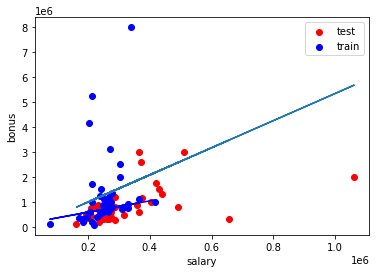

In [52]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [53]:
print(reg.coef_)

[2.27410114]


In [54]:
print(reg.intercept_)

124444.38886605436


In [55]:
reg.score(feature_train,target_train)

-0.12359798540343814

In [56]:
reg.score(feature_test,target_test)

0.251488150398397